In [1]:
import pandas as pd
df = pd.read_csv('data/taxi-fares.csv', parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


In [2]:
from math import sqrt

df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)

for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 
         'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]

df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

/Users/daniyar/notes/kstu/f2024/data_science/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']
hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 5.2751 - mae: 5.2751 - val_loss: 3.3321 - val_mae: 3.3321
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 2.8300 - mae: 2.8300 - val_loss: 2.4094 - val_mae: 2.4094
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 2.3913 - mae: 2.3913 - val_loss: 2.3893 - val_mae: 2.3893
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 2.3960 - mae: 2.3960 - val_loss: 2.3799 - val_mae: 2.3799
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 2.4001 - mae: 2.4001 - val_loss: 2.3944 - val_mae: 2.3944
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 2.3521 - mae: 2.3521 - val_loss: 2.3718 - val_mae: 2.3718
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 2.3698 - mae: 2.3698 - val_loss: 2.3746 - val_mae: 2.3746
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 2.3897 - mae: 2.3897 - val_loss: 2.3882 - val_mae: 2.3882
Epoch 9/100
187/187 ━━━━━━━━━━━━

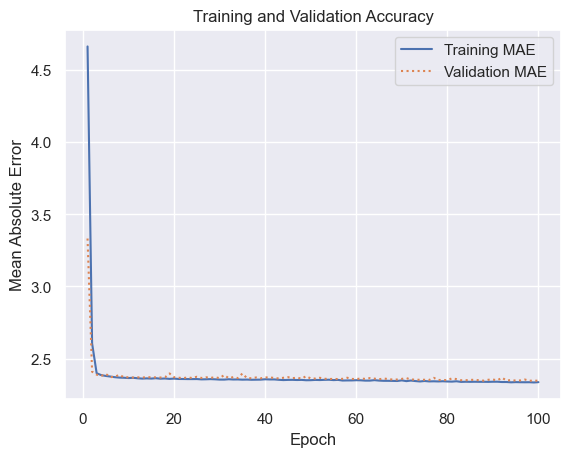

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()

In [6]:
from sklearn.metrics import r2_score
r2_score(y, model.predict(x))

729/729 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step


0.7308420794548078

In [7]:
import numpy as np
model.predict(np.array([[4, 17, 2.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[10.652164]], dtype=float32)

In [8]:
model.predict(np.array([[5, 17, 2.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[10.728848]], dtype=float32)

# first try

Epoch 99/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 2.2871 - mae: 2.2871 - val_loss: 2.2858 - val_mae: 2.2858

Epoch 100/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 2.2615 - mae: 2.2615 - val_loss: 2.2838 - val_mae: 2.2838

R2: 0.7429765770115601

predict 1: array([[10.438305]], dtype=float32)

predict 2: array([[10.1964035]], dtype=float32)

# second try (ничего не меняем)

Epoch 99/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 2.3250 - mae: 2.3250 - val_loss: 2.2763 - val_mae: 2.2763

Epoch 100/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 2.2724 - mae: 2.2724 - val_loss: 2.2807 - val_mae: 2.2807

R2: 0.7401040333611213

predict 1: array([[10.463156]], dtype=float32)

predict 2: array([[10.228653]], dtype=float32)

(*Тут видно что когда повторно запускаем с теми же параметрами, то точность незначительно меняется из-за того, что веса в начале инициализируются с разными значениями.*)

# third try (количество нейронов: 128)
Epoch 99/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 2.2707 - mae: 2.2707 - val_loss: 2.3025 - val_mae: 2.3025

Epoch 100/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 2.3364 - mae: 2.3364 - val_loss: 2.3146 - val_mae: 2.3146

R2: 0.7296747224858564

predict 1: array([[10.357025]], dtype=float32)

predict 2: array([[10.185058]], dtype=float32)


# forth try (количество нейронов: 1024, 1024)
Epoch 99/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.2911 - mae: 2.2911 - val_loss: 2.2875 - val_mae: 2.2875

Epoch 100/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.2629 - mae: 2.2629 - val_loss: 2.2740 - val_mae: 2.2740

R2: 0.7479438952907329

predict 1: array([[10.900642]], dtype=float32)

predict 2: array([[10.728992]], dtype=float32)

(*несмотря на то, что мы добавили еще один слой и увеличили количество нейронов, результат можно сказать не улучшается*)

# fifth try (количество нейронов: 16)
Epoch 99/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 2.3551 - mae: 2.3551 - val_loss: 2.3471 - val_mae: 2.3471

Epoch 100/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 2.3619 - mae: 2.3619 - val_loss: 2.3475 - val_mae: 2.3475


R2: 0.7308420794548078

predict 1: array([[10.652164]], dtype=float32)

predict 2: array([[10.728848]], dtype=float32)

(*хоть и нейронов мало, но результат сравним с предыдущими попытками*)